<a href="https://colab.research.google.com/github/JyothiAchanta97/DigitalImageProcess/blob/main/Ques3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

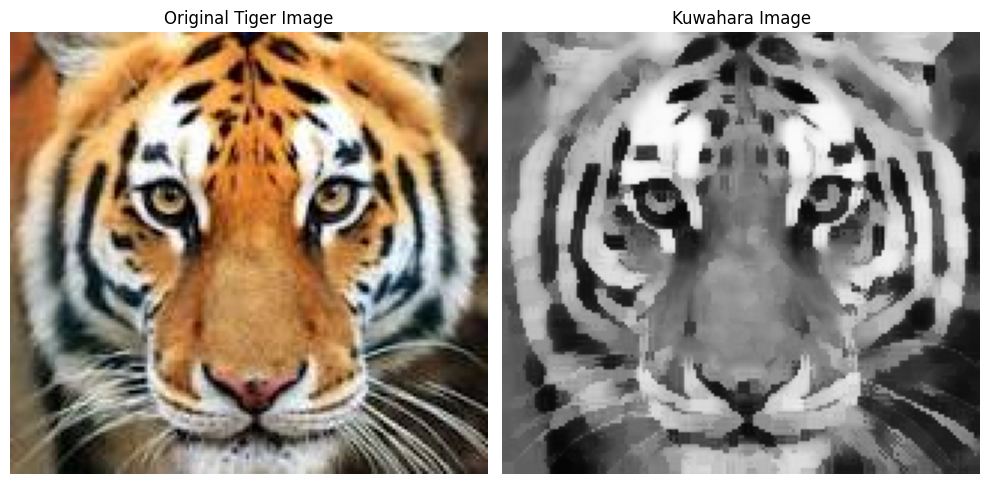

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def kuwahara_filter(image, window_size=5):
    img = image.convert("RGB")
    img_array = np.array(img)
    height, width, _ = img_array.shape

    pad_size = window_size // 2
    padded_img = np.pad(img_array, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')

    output = np.zeros_like(img_array)

    for y in range(height):
        for x in range(width):
            roi = padded_img[y:y + window_size, x:x + window_size]
            q1 = roi[:pad_size + 1, :pad_size + 1]
            q2 = roi[:pad_size + 1, pad_size:]
            q3 = roi[pad_size:, :pad_size + 1]
            q4 = roi[pad_size:, pad_size:]
            means = [np.mean(q) for q in (q1, q2, q3, q4)]
            variances = [np.var(q) for q in (q1, q2, q3, q4)]
            min_variance_index = np.argmin(variances)
            output[y, x] = means[min_variance_index]

    return Image.fromarray(np.uint8(output))

# Loading the image from the folder
image_path = 'tiger.jpeg'
image = Image.open(image_path)

# Applying Kuwahara filter to the original image
kw_filter_image = kuwahara_filter(image)

# Show original image and Kuwahara filtered image
plt.figure(figsize=(10, 5))

# To display Original Image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Tiger Image")
plt.axis('off')

# To show Kuwahara Filtered Image
plt.subplot(1, 2, 2)
plt.imshow(kw_filter_image)
plt.title("Kuwahara Image")
plt.axis('off')

plt.tight_layout()
plt.show()







# New Section